# CMPE482 FINAL PROJECT

# PROJECT 1

ANSWER-1

In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300

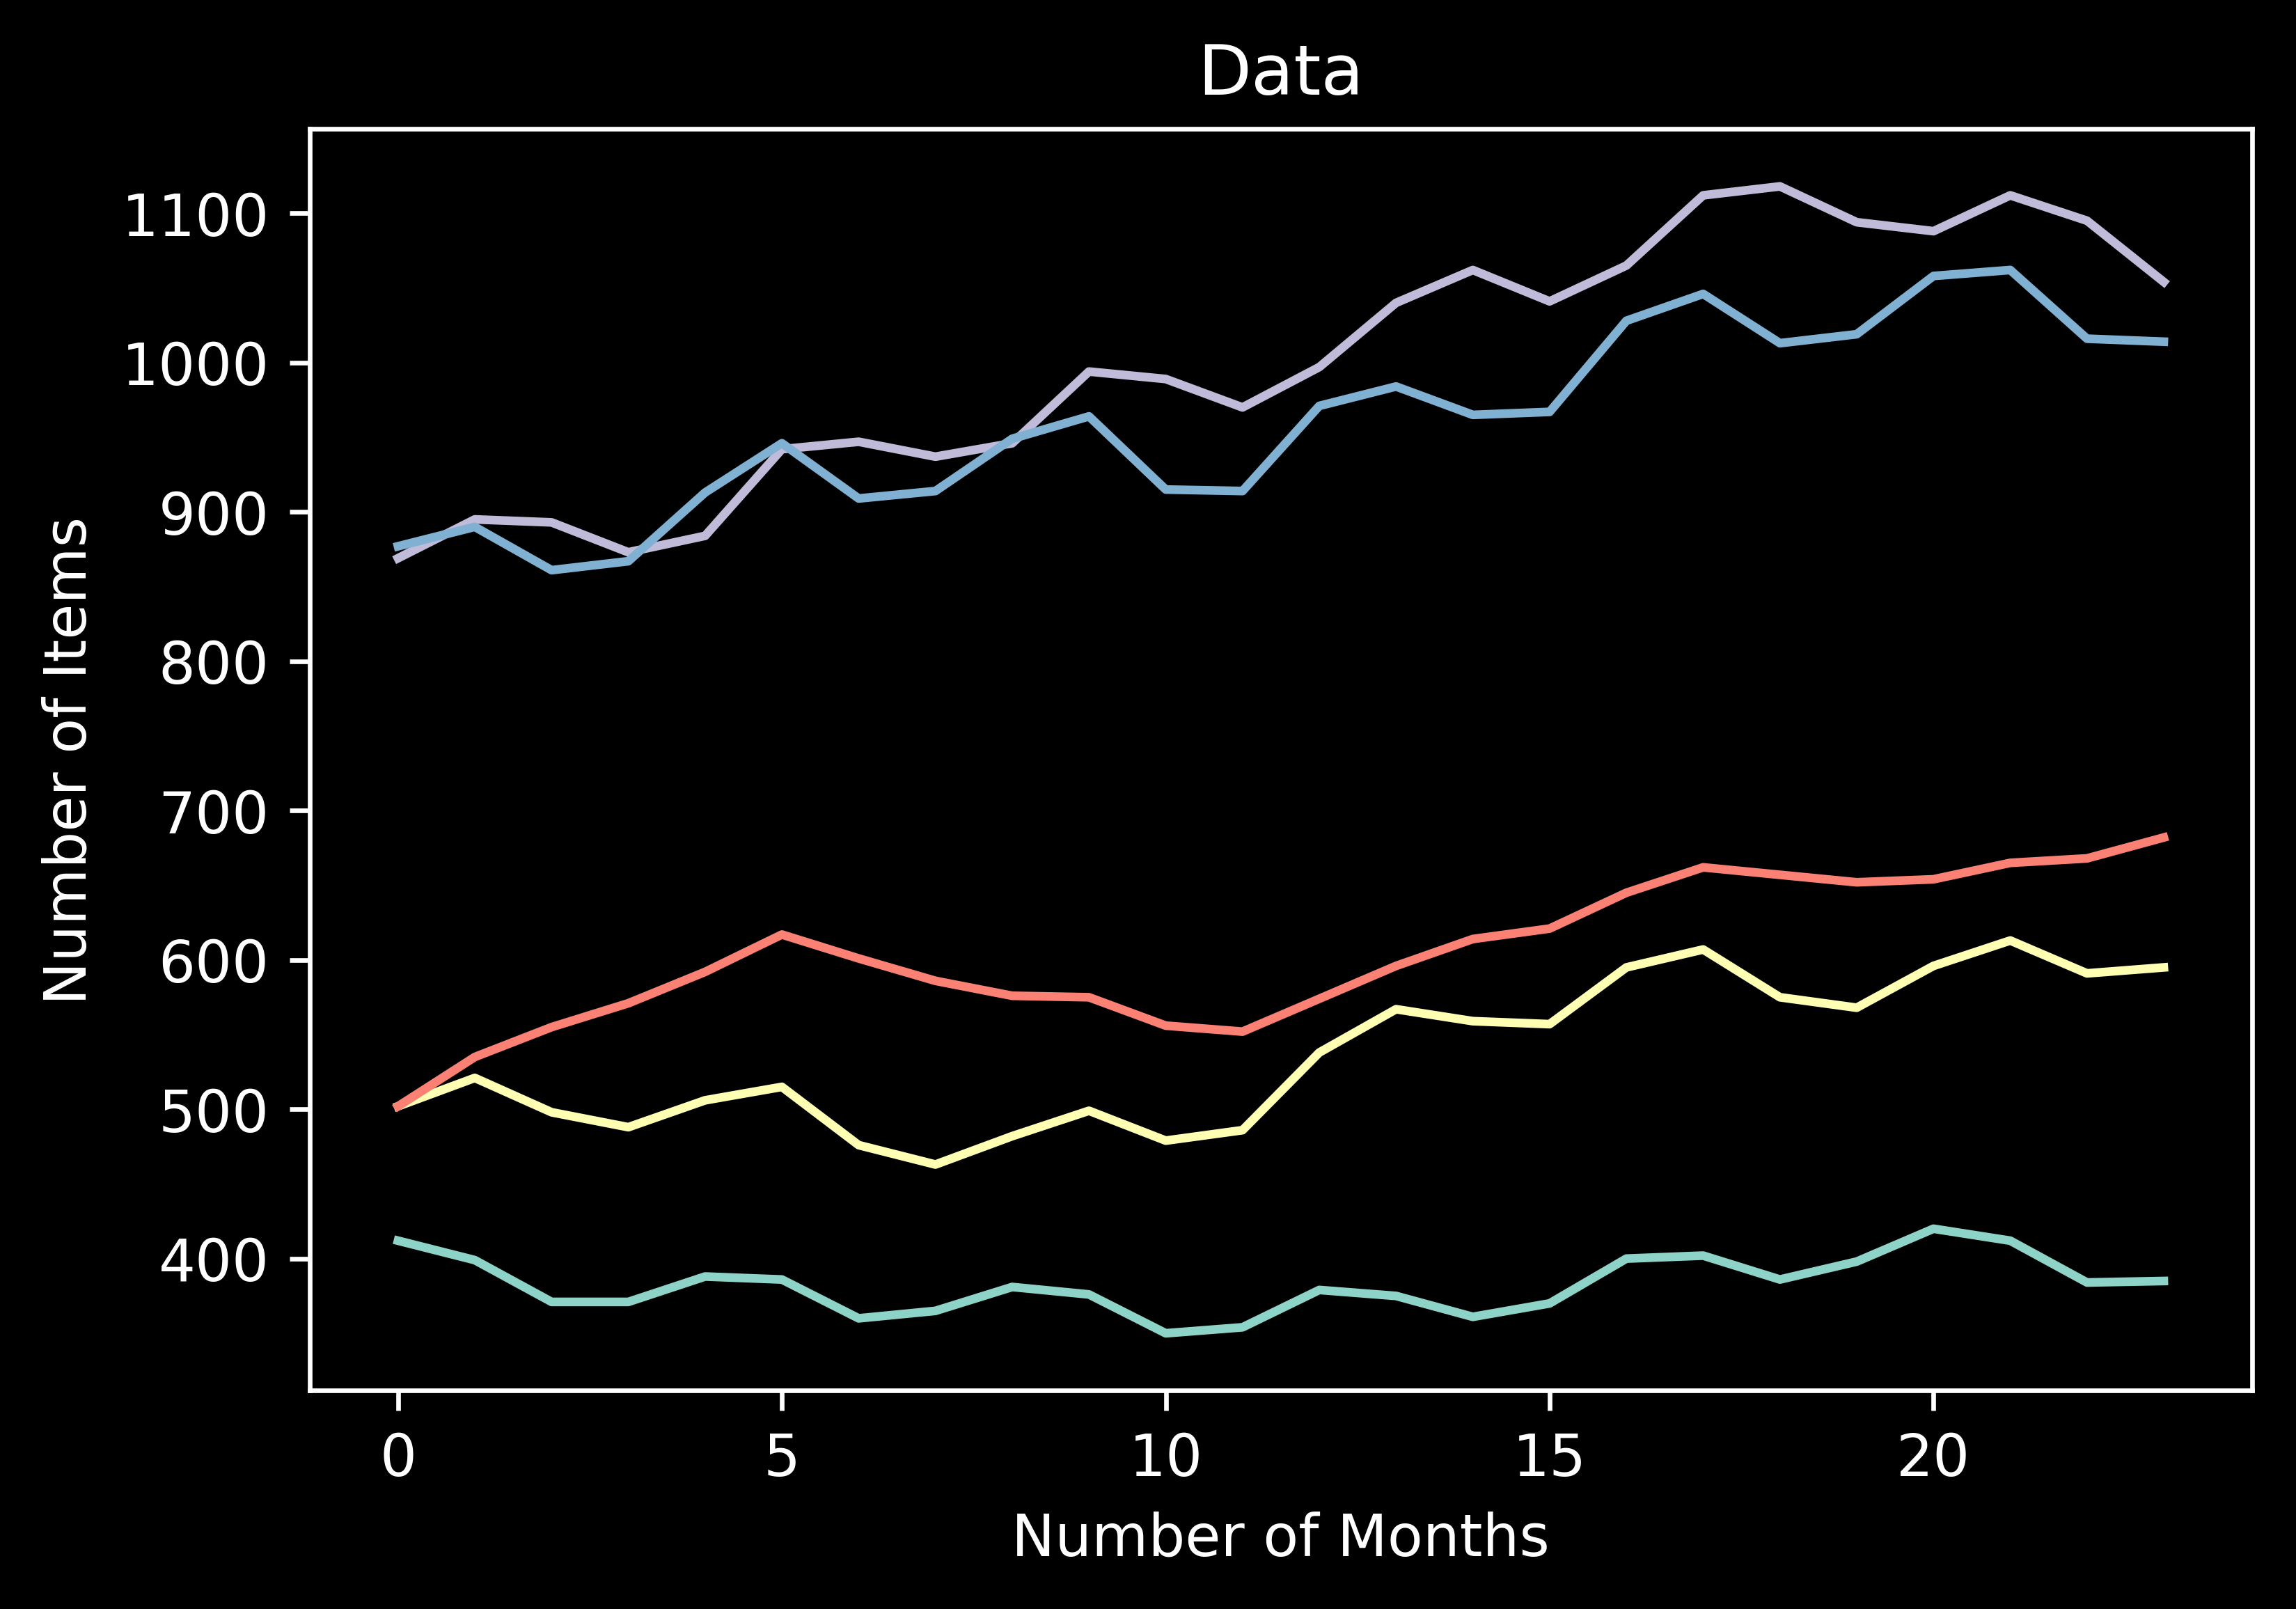

In [3]:
Data = array([[412,399,371,371,388,386,360,365,381,376,350,354,379,375,361,370,400,402,386,398,420,412,384,385],
             [502,521,498,488,506,515,476,463,482,499,479,486,538,567,559,557,595,607,575,568,596,613,591,595],
             [869,895,893,873,884,942,947,937,946,994,989,970,997,1040,1062,1041,1065,1112,1118,1094,1088,1112,1095,1054],
             [502,535,555,571,592,617,601,586,576,575,556,552,574,596,614,621,645,662,657,652,654,665,668,682],
             [877,890,861,867,913,946,909,914,949,964,915,914,971,984,965,967,1028,1046,1013,1019,1058,1062,1016,1014]])

num_of_items,num_of_months = shape(Data);

for i in range(num_of_items):
    plt.plot(Data[i])

    
plt.xlabel('Number of Months')
plt.ylabel('Number of Items')
plt.title('Data')
plt.show()

ANSWER-2

In [4]:
def regression(length,m):
    A = zeros((length,8))
    for t in range(m,length+m):
        A[t-m] = array([1.0,1.0*t,sin(0.5*pi*t),cos(0.5*pi*t),sin(pi*t/6),cos(pi*t/6),sin(pi*t/12),cos(pi*t/12)])
    return A

ANSWER-3

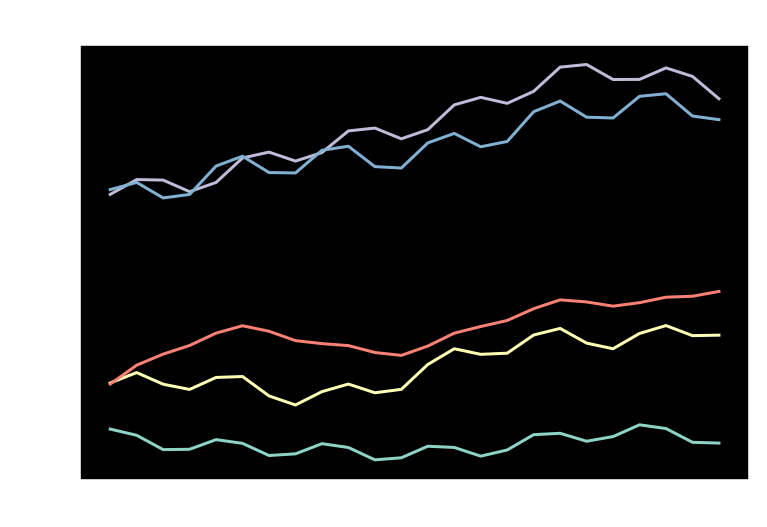

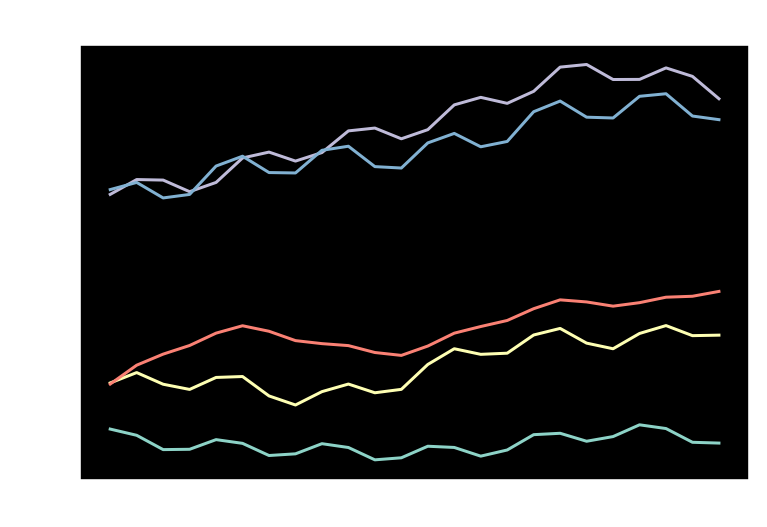

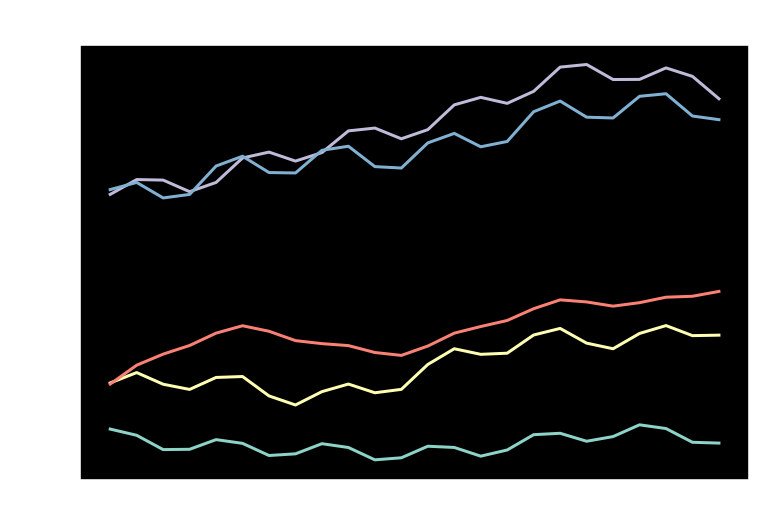

Error table for item 1
[[0.00000000e+00 4.81952360e-15 1.15142562e-14]
 [4.81952360e-15 0.00000000e+00 6.69473265e-15]
 [1.15142562e-14 6.69473265e-15 0.00000000e+00]]
Error table for item 2
[[0.00000000e+00 1.06086293e-15 5.68681890e-15]
 [1.06086293e-15 0.00000000e+00 4.62595597e-15]
 [5.68681890e-15 4.62595597e-15 0.00000000e+00]]
Error table for item 3
[[0.00000000e+00 2.72988596e-15 2.98543040e-15]
 [2.72988596e-15 0.00000000e+00 5.71531636e-15]
 [2.98543040e-15 5.71531636e-15 0.00000000e+00]]
Error table for item 4
[[0.00000000e+00 5.79445060e-15 2.85876018e-15]
 [5.79445060e-15 0.00000000e+00 2.93569042e-15]
 [2.85876018e-15 2.93569042e-15 0.00000000e+00]]
Error table for item 5
[[0.00000000e+00 7.83107794e-15 9.53507881e-15]
 [7.83107794e-15 0.00000000e+00 1.70400087e-15]
 [9.53507881e-15 1.70400087e-15 0.00000000e+00]]


In [6]:
%matplotlib inline

A = regression(len(Data[0]),0)
wNormE = {}
wQR = {}
wSVD = {}

for i in range(len(Data)):
    ATA = dot(A.conj().T,A)
    ATB = dot(A.conj().T,Data[i])
    w = linalg.solve(ATA,ATB)
    wNormE[i] = w
    x = dot(A,w)
    plt.plot(x)
plt.title("Normal Equations")
plt.show()

for i in range(len(Data)):
    Q, R = linalg.qr(A)
    QTB = dot(Q.conj().T,Data[i])
    w = linalg.solve(R,QTB)
    wQR[i] = w
    x = dot(A,w)
    plt.plot(x)
plt.title("QR Factorization")
plt.show()

for i in range(len(Data)):
    U, s, V = linalg.svd(A, full_matrices=False)
    S = diag(s)
    UTB = dot(U.conj().T,Data[i])
    w = dot(V.T,linalg.solve(S,UTB))
    wSVD[i] = w
    x = dot(A,w)
    plt.plot(x)
plt.title("SVD Decomposition")
plt.show()

#6 months prediction
Aprediction = regression(6,24)

for i in range(len(Data)):
    E = zeros((3,3))
    for j in range(6):
        yNormE = dot(Aprediction[j],wNormE[i])
        yQR    = dot(Aprediction[j],wQR[i])
        ySVD   = dot(Aprediction[j],wSVD[i])
        E[0,1] = E[0,1] + abs(yNormE - yQR)/yQR
        E[1,0] = E[1,0] + abs(yNormE - yQR)/yNormE
        E[0,2] = E[0,2] + abs(yNormE - ySVD)/ySVD
        E[2,0] = E[2,0] + abs(yNormE - ySVD)/yNormE
        E[1,2] = E[1,2] + abs(yQR - ySVD)/ySVD
        E[2,1] = E[2,1] + abs(yQR - ySVD)/yQR
    print ("Error table for item",i+1)
    print (E)

ASNWER-4 and ANSWER-5

In [9]:
def project1(data):
    Data_dict = {}
    count = 0
    file = open(data, 'r')
    lines = file.readlines()
    file.close()
    for line in lines:
        data_array = array([])
        for num in line.split(' '):
            s = float(num)
            data_array = append(data_array,s)
        Data_dict[count] = data_array
        count = count + 1
    Data = zeros((len(Data_dict),len(Data_dict[0])))
    for i in range(len(Data_dict)):
        Data[i] = Data_dict[i]
        
    for i in range(len(Data)):
        print ("Predictions with Normal Equations for item",i+1)
        pNormE = dot(Aprediction,wNormE[i])
        print (pNormE)
        print ("Predictions with QR Factorization for item",i+1)
        pQR = dot(Aprediction,wQR[i])
        print (pQR)
        print ("Predictions with SVD Decomposition for item",i+1)
        pSVD = dot(Aprediction,wSVD[i])
        print (pSVD)
        
project1("data.txt")

Predictions with Normal Equations for item 1
[398.43962295 386.35447492 358.57893734 359.19057805 377.94709037
 370.71707153]
Predictions with QR Factorization for item 1
[398.43962295 386.35447492 358.57893734 359.19057805 377.94709037
 370.71707153]
Predictions with SVD Decomposition for item 1
[398.43962295 386.35447492 358.57893734 359.19057805 377.94709037
 370.71707153]
Predictions with Normal Equations for item 2
[633.50728676 653.6405252  631.01725399 620.91576101 644.19228316
 645.98079773]
Predictions with QR Factorization for item 2
[633.50728676 653.6405252  631.01725399 620.91576101 644.19228316
 645.98079773]
Predictions with SVD Decomposition for item 2
[633.50728676 653.6405252  631.01725399 620.91576101 644.19228316
 645.98079773]
Predictions with Normal Equations for item 3
[1048.53632354 1077.35221848 1076.31760248 1053.79551944 1071.75656889
 1119.26273192]
Predictions with QR Factorization for item 3
[1048.53632354 1077.35221848 1076.31760248 1053.79551944 1071.756

ANSWER 6,7,8,9

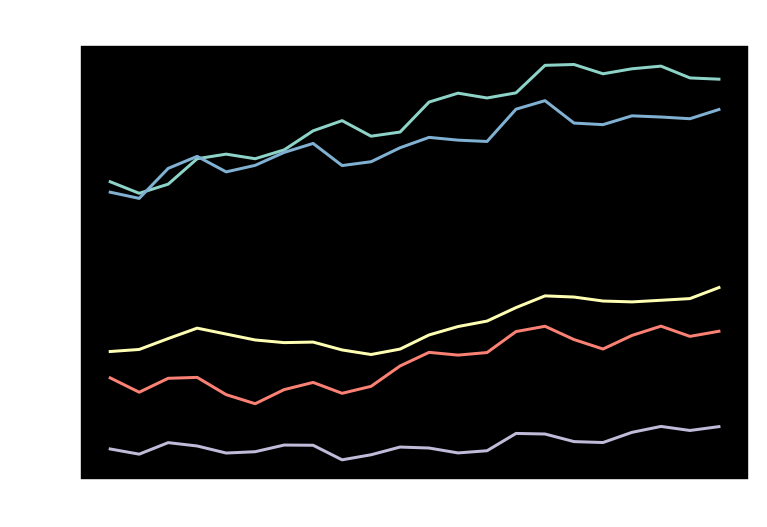

Weights are:
[ 0.26666643  0.02615322 -0.67717957  0.40185495  0.22973817 -1.02887207
  0.45305757  0.03430749  0.74730745  0.22950712 -0.53789493  0.2120374
  0.34539623  0.00499984  0.51301    -0.74873327  0.16385203  0.5376621
  0.28720331  0.18003957 -0.86707706  0.64996463  0.74109323 -0.46691473
  0.58960088 -0.42899551  0.0749637  -0.21744567  0.01312186  0.46103624
 -0.81126552  0.75936676  0.35189518 -0.74349917  1.09467705 -1.54647756
  0.50359748  0.24124349  0.06015067  0.57514974 -1.95387664  1.19977573
  0.8735583  -0.49821919 -0.34109038 -1.02126399  0.52404971 -0.39931107
  1.11340027  0.93475359]
Predictions are:
[1061.65470791  682.56518319  439.40017061  591.63004191 1119.75847816]


In [11]:
def project2(D_tau,data):
    Data_dict = {}
    count = 0
    file = open(data, 'r')
    lines = file.readlines()
    file.close()
    for line in lines:
        data_array = array([])
        previous = 0
        for num in line.split(' '):
            if num == 'NaN':
                if previous > 0:
                    s = previous
                else:
                    for number in line.strip().split(' '):
                        if number != 'NaN':
                            s = float(number)
                            previous = s
                            break
            else:
                s = float(num)
                previous = s
            data_array = append(data_array,s)
        Data_dict[count] = data_array
        count = count + 1
        
    T = len(Data_dict[0])
    I = len(Data_dict)
    Data = zeros((I,T))
    for i in range(I):
        Data[i] = Data_dict[i]
    
    #Construction of A matrix and b vector
    A = zeros((I*(T-D_tau),I*I*D_tau))
    b = zeros((I*(T-D_tau)))
    count_b = 0
    for i in range(I):
        for j in range(D_tau,T):
            b[count_b] = Data[i,j]
            count_b = count_b + 1
            count_t = 1
            count_i = 0
            for k in range(i*I*D_tau,(i+1)*I*D_tau):
                A[i*(T-D_tau)+j-D_tau,k] = Data[count_i,j-count_t]
                if count_t == D_tau:
                    count_t = 1
                    count_i = count_i + 1
                else:
                    count_t = count_t + 1

    #SVD Factorization
    U, s, V = linalg.svd(A, full_matrices=False)
    S = diag(s)
    UTB = dot(U.conj().T,b)
    w = dot(V.T,linalg.solve(S,UTB))
    
    #Reconstruction
    for i in range(I):
        Xaxis = range(D_tau,T)
        Yaxis = dot(A[i*(T-D_tau):(i+1)*(T-D_tau),:],w)
        plt.plot(Xaxis,Yaxis)
    plt.title('Reconstruction from past Data')
    plt.show()
    
    #Prediction
    Aprediction = zeros((I,I*I*D_tau))
    for i in range(I):
        t = T
        count_t = 1
        count_i = 0
        for k in range(i*I*D_tau,(i+1)*I*D_tau):
            Aprediction[i,k] = Data[count_i,t-count_t]
            if count_t == D_tau:
                count_t = 1
                count_i = count_i + 1
            else:
                count_t = count_t + 1
    predictions = dot(Aprediction,w)
    return w, predictions  

w, pred = project2(2,"data2.txt")
print ("Weights are:")
print (w)
print ("Predictions are:")
print (pred)

# PROJECT 2

PART 1

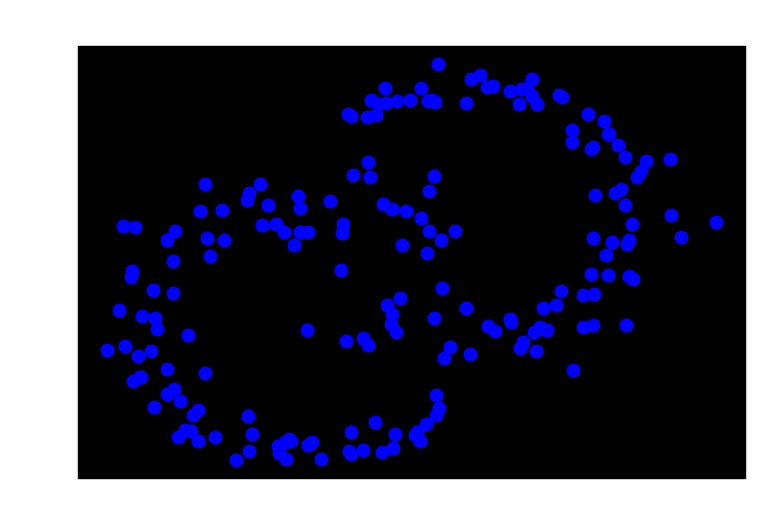

In [13]:
Points_dict = {}
count = 0
file = open("points.txt", 'r')
lines = file.readlines()
file.close()
for line in lines:
    points_array = array([])
    for num in line.split(' '):
        s = float(num)
        points_array = append(points_array,s)
    Points_dict[count] = points_array
    count = count + 1
Points = zeros((len(Points_dict),len(Points_dict[0])))
for i in range(len(Points_dict)):
    Points[i] = Points_dict[i]

for p in Points:
    plt.plot(p[0],p[1],'bo')
plt.title('Points')
plt.show()

In [28]:
int(Edge_Matrix)

TypeError: only size-1 arrays can be converted to Python scalars

PART 2

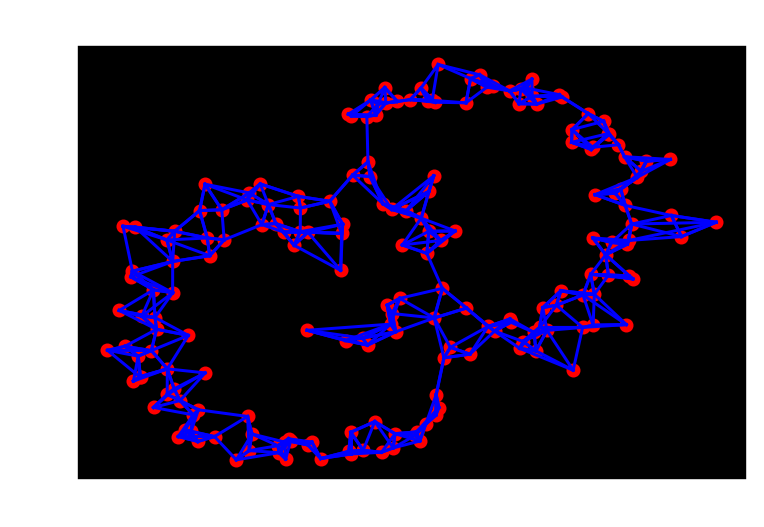

In [29]:
k=5
num_of_points = len(Points)
distanceMatrix = zeros((num_of_points,num_of_points))
for i in range(num_of_points):
    for j in range(num_of_points):
        if i==j:
            distanceMatrix[i,j] = 0
        else:
            distanceMatrix[i,j] = sqrt(inner((Points[i]-Points[j]),(Points[i]-Points[j])))

Edge_Matrix = zeros((num_of_points, k))
for i in range(num_of_points):
    Edge = distanceMatrix[i].argsort()[::1][:k]
    Edge_Matrix[i] = Edge

for point in Points:
    plt.plot(point[0],point[1],'ro')
    
for i in range(num_of_points):
    for j in range(k):
        x = array([Points[i,0],Points[Edge_Matrix[i,j].astype(int),0]])
        y = array([Points[i,1],Points[Edge_Matrix[i,j].astype(int),1]])
        plt.plot(x,y,"b-")
plt.title('k Nearest Neighbor Graph')
plt.show()

PART 3

In [31]:
sigma = 0.3
W = zeros((num_of_points,num_of_points))
for i in range(num_of_points):
    for j in Edge_Matrix[i]:
        j = int(j)
        W[i,j] = exp(-0.5*(distanceMatrix[i,j]/sigma)**2)
        W[j,i] = exp(-0.5*(distanceMatrix[i,j]/sigma)**2)
print (W)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


PART 4

In [32]:
K = zeros((num_of_points,num_of_points))
for i in range(num_of_points):
    K[i,i] = 1.0/sum(W[i])
L = identity(num_of_points) - dot(W,K)
    
#Inverse Iteration
e_value = 0
coef = 0.0001
while e_value<0.00001:
    e_vector = random.rand(num_of_points,1)
    for i in range(100):
        w_vector = linalg.solve((L-coef*identity(num_of_points)),e_vector)
        e_vector = w_vector/linalg.norm(w_vector)
        e_value = dot(e_vector.conj().T,dot(L,e_vector))
    coef = coef + 0.0001

PART 5

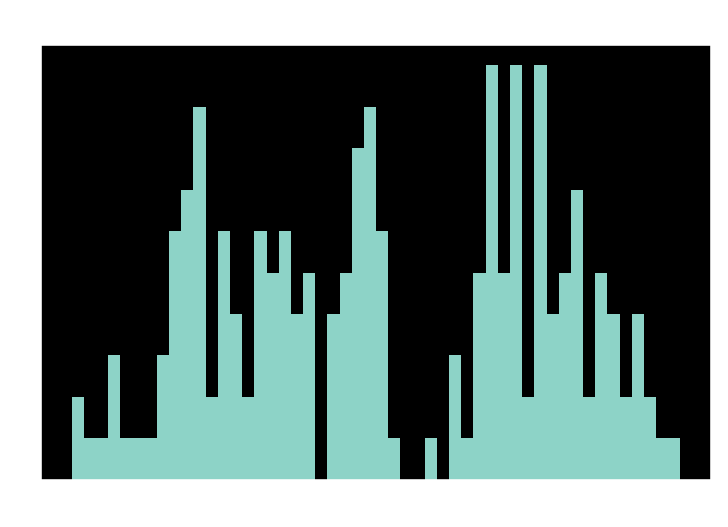

In [34]:
plt.hist(e_vector, 50, density = 1)
plt.title('Histogram of Eigenvector Entries')
plt.show()

PART 6

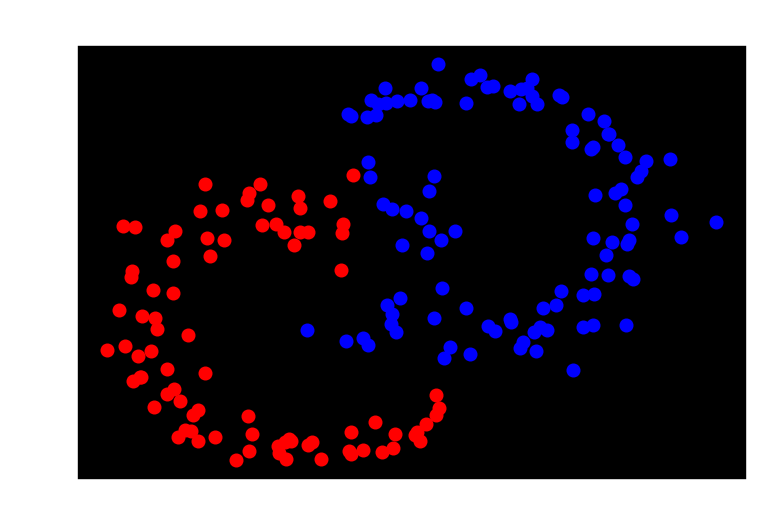

In [35]:
tau = 0.0
for i in range(num_of_points):
    if e_vector[i][0] <= tau:
        plt.plot(Points[i,0],Points[i,1],'bo')
    else:
        plt.plot(Points[i,0],Points[i,1],'ro')
plt.title('Spectral Clustering')
plt.show()